In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing DataSets

In [56]:
ufc_masterdf = pd.read_csv('../datasets/raw/ufc-master.csv')
ufc_masterdf.head()

,RedFighter,BlueFighter,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Date,Location,Country,Winner,...,FinishDetails,FinishRound,FinishRoundTime,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
0,Neil Magny,Carlos Prates,550.0,-800.0,550.0000,12.5000,2024-11-09,"Las Vegas, Nevada, USA",USA,Blue,...,Punch,1.0,4:50,290.0,1100.0,800.0,1600.0,800.0,2000.0,-400.0
1,Gerald Meerschaert,Reinier de Ridder,250.0,-310.0,250.0000,32.2581,2024-11-09,"Las Vegas, Nevada, USA",USA,Blue,...,Arm Triangle,3.0,1:44,704.0,700.0,200.0,600.0,165.0,1400.0,450.0
2,Gaston Bolanos,Cortavious Romious,205.0,-250.0,205.0000,40.0000,2024-11-09,"Las Vegas, Nevada, USA",USA,Red,...,NaN,3.0,5:00,900.0,550.0,275.0,3000.0,165.0,380.0,450.0
3,Luana Pinheiro,Gillian Robertson,360.0,-470.0,360.0000,21.2766,2024-11-09,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,3.0,5:00,900.0,600.0,250.0,2200.0,110.0,900.0,500.0
4,Mansur Abdul-Malik,Dusko Todorovic,-485.0,370.0,20.6186,370.0000,2024-11-09,"Las Vegas, Nevada, USA",USA,Red,...,Punches,1.0,2:44,164.0,600.0,NaN,800.0,NaN,-250.0,NaN


## Data Preperation and Cleaning



In [57]:
ufc_masterdf.info

<bound method DataFrame.info of               RedFighter         BlueFighter  RedOdds  BlueOdds  \
0             Neil Magny       Carlos Prates    550.0    -800.0   
1     Gerald Meerschaert   Reinier de Ridder    250.0    -310.0   
2         Gaston Bolanos  Cortavious Romious    205.0    -250.0   
3         Luana Pinheiro   Gillian Robertson    360.0    -470.0   
4     Mansur Abdul-Malik     Dusko Todorovic   -485.0     370.0   
...                  ...                 ...      ...       ...   
6484        Duane Ludwig       Darren Elkins   -155.0     135.0   
6485         John Howard      Daniel Roberts   -210.0     175.0   
6486      Brendan Schaub       Chase Gormley   -260.0     220.0   
6487         Mike Pierce       Julio Paulino   -420.0     335.0   
6488        Eric Schafer         Jason Brilz    140.0    -160.0   

      RedExpectedValue  BlueExpectedValue        Date  \
0             550.0000            12.5000  2024-11-09   
1             250.0000            32.2581  2024-1

In [58]:
# Checking for missing values in the dataset
missing_values = ufc_masterdf.isnull().sum().sort_values(ascending=False)

# Display columns with missing values
missing_values[missing_values > 0]


BWFeatherweightRank      6488
RWFeatherweightRank      6480
BPFPRank                 6422
BWFlyweightRank          6417
RWFlyweightRank          6393
BWStrawweightRank        6390
BWBantamweightRank       6382
BLightHeavyweightRank    6371
BBantamweightRank        6371
BWelterweightRank        6371
BLightweightRank         6370
BFeatherweightRank       6366
BFlyweightRank           6359
BMiddleweightRank        6352
RWStrawweightRank        6344
BHeavyweightRank         6343
RWBantamweightRank       6335
RFeatherweightRank       6314
RBantamweightRank        6310
RLightHeavyweightRank    6307
RMiddleweightRank        6307
RLightweightRank         6306
RHeavyweightRank         6306
RFlyweightRank           6303
RWelterweightRank        6300
RPFPRank                 6239
BMatchWCRank             5299
RMatchWCRank             4725
FinishDetails            3616
EmptyArena               1447
BKOOdds                  1358
BSubOdds                 1357
RSubOdds                 1332
RKOOdds   

In [59]:
# Dropping columns with a high percentage of missing values that are not essential for the analysis
columns_to_drop = ['BWFeatherweightRank', 'RWFeatherweightRank', 'BPFPRank', 'BWFlyweightRank', 'RWFlyweightRank',
                   'BWStrawweightRank', 'BWBantamweightRank', 'BBantamweightRank', 'BWelterweightRank',
                   'BLightHeavyweightRank', 'BLightweightRank', 'BFeatherweightRank', 'BFlyweightRank',
                   'BMiddleweightRank', 'RWStrawweightRank', 'BHeavyweightRank', 'RWBantamweightRank', 'RFeatherweightRank',
                   'RLightHeavyweightRank', 'RMiddleweightRank', 'RBantamweightRank', 'RHeavyweightRank', 'RFlyweightRank',
                   'RLightweightRank', 'RWelterweightRank', 'RPFPRank', 'BMatchWCRank', 'RMatchWCRank', 'FinishDetails']

ufc_masterdf = ufc_masterdf.drop(columns=columns_to_drop)

# Dropping rows with missing values in essential columns for analysis
ufc_cleaned = ufc_masterdf.dropna(subset=['RedOdds', 'BlueOdds', 'TotalFightTimeSecs', 'RedAvgSigStrLanded', 'BlueAvgSigStrLanded',
                               'RedAvgTDLanded', 'BlueAvgTDLanded', 'RedAvgSubAtt', 'BlueAvgSubAtt', 'RedAvgSigStrPct',
                               'BlueAvgSigStrPct', 'RedAvgTDPct', 'BlueAvgTDPct', 'Winner', 'WeightClass'])


# Check if we've sufficiently cleaned the data by looking at missing values again
ufc_cleaned.isnull().sum().sum(), ufc_cleaned.shape

# Verifying the cleaned data
ufc_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4670 entries, 0 to 6488
Data columns (total 89 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   RedFighter                   4670 non-null   object 
 1   BlueFighter                  4670 non-null   object 
 2   RedOdds                      4670 non-null   float64
 3   BlueOdds                     4670 non-null   float64
 4   RedExpectedValue             4670 non-null   float64
 5   BlueExpectedValue            4670 non-null   float64
 6   Date                         4670 non-null   object 
 7   Location                     4670 non-null   object 
 8   Country                      4670 non-null   object 
 9   Winner                       4670 non-null   object 
 10  TitleBout                    4670 non-null   bool   
 11  WeightClass                  4670 non-null   object 
 12  Gender                       4670 non-null   object 
 13  NumberOfRounds         

## UFC Winning Visualizations

In [60]:
# Creating calculated fields
ufc_cleaned['RedExperience'] = ufc_cleaned['RedAvgSigStrLanded'] + ufc_cleaned['RedAvgTDLanded'] + ufc_cleaned['RedAvgSubAtt']
ufc_cleaned['BlueExperience'] = ufc_cleaned['BlueAvgSigStrLanded'] + ufc_cleaned['BlueAvgTDLanded'] + ufc_cleaned['BlueAvgSubAtt']
ufc_cleaned['RedTotalAccuracy'] = (ufc_cleaned['RedAvgSigStrPct'] + ufc_cleaned['RedAvgTDPct']) / 2
ufc_cleaned['BlueTotalAccuracy'] = (ufc_cleaned['BlueAvgSigStrPct'] + ufc_cleaned['BlueAvgTDPct']) / 2


/var/folders/lt/fsgjhvpn4sn8qyv_xtryy0lm0000gn/T/ipykernel_57747/1926201557.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ufc_cleaned['RedExperience'] = ufc_cleaned['RedAvgSigStrLanded'] + ufc_cleaned['RedAvgTDLanded'] + ufc_cleaned['RedAvgSubAtt']
/var/folders/lt/fsgjhvpn4sn8qyv_xtryy0lm0000gn/T/ipykernel_57747/1926201557.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ufc_cleaned['BlueExperience'] = ufc_cleaned['BlueAvgSigStrLanded'] + ufc_cleaned['BlueAvgTDLanded'] + ufc_cleaned['BlueAvgSubAtt'

### Win Rate by Weight Class

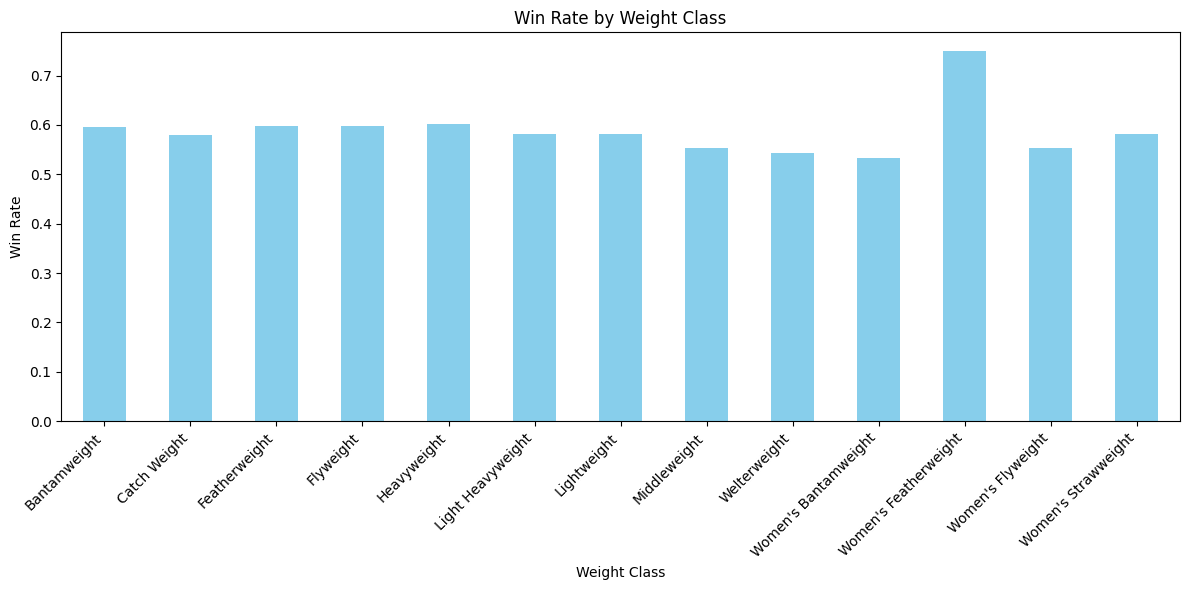

In [61]:
weight_class_win_rate = ufc_cleaned.groupby('WeightClass')['Winner'].apply(lambda x: (x == 'Red').mean())
# Plotting win rate by weight class
plt.figure(figsize=(12, 6))
weight_class_win_rate.plot(kind='bar', color='skyblue')
plt.title('Win Rate by Weight Class')
plt.xlabel('Weight Class')
plt.ylabel('Win Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This bar chart displays the win rate for each weight class, indicating which categories have higher or lower winning percentages. Certain weight classes might showcase different dynamics, like endurance and strength, which could impact win likelihood.

### Effect of Strike Accuracy on Winning

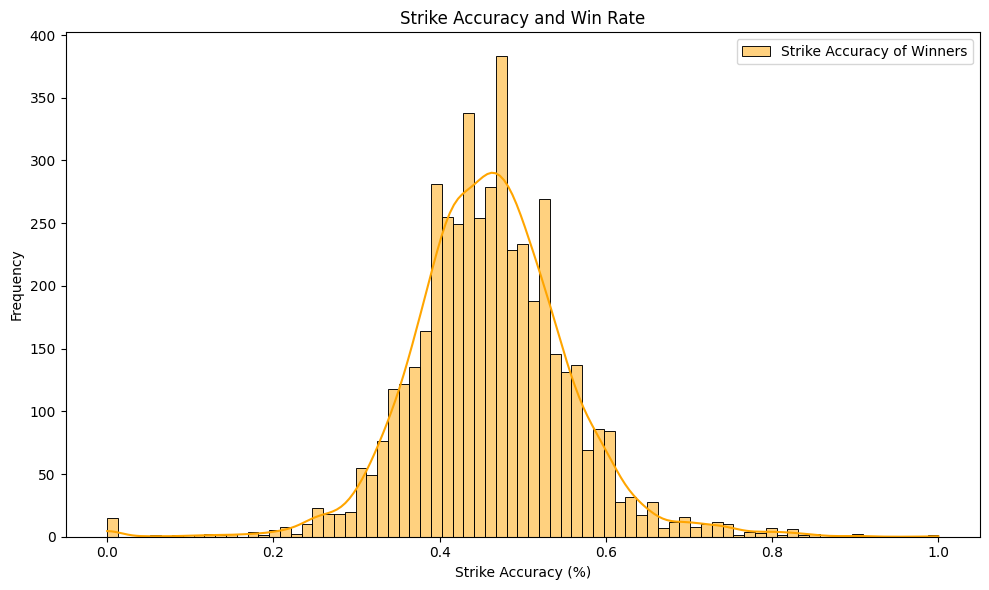

In [62]:
plt.figure(figsize=(10, 6))
sns.histplot(ufc_cleaned, x='RedAvgSigStrPct', kde=True, color='orange', label='Strike Accuracy of Winners')
plt.title('Strike Accuracy and Win Rate')
plt.xlabel('Strike Accuracy (%)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()


The histogram shows the distribution of winners based on their strike accuracy, suggesting that higher accuracy generally correlates with winning outcomes. This finding emphasizes the importance of landing precise strikes in UFC success.

### Takedown Accuracy and Win Rate

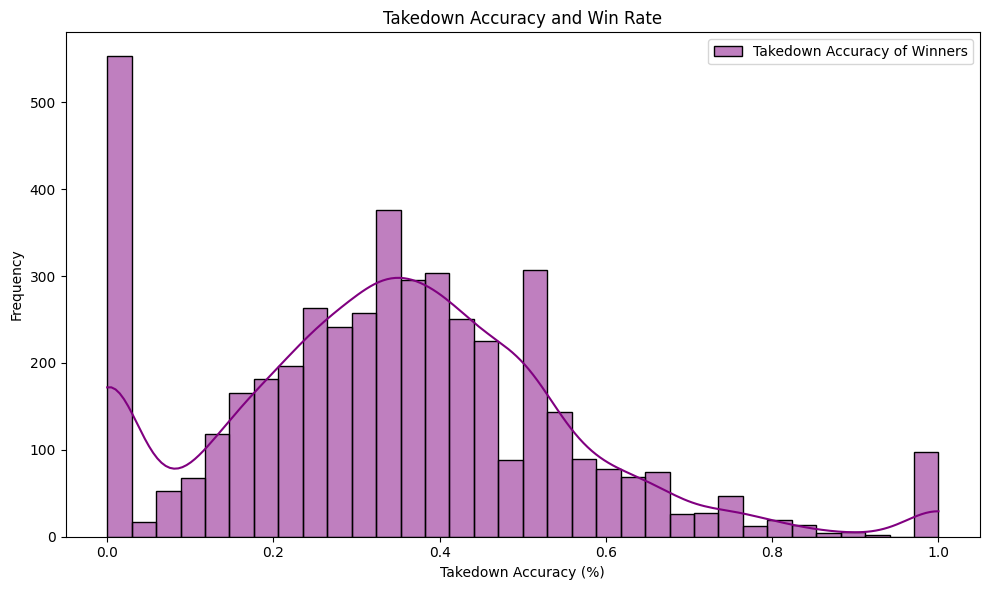

In [63]:
plt.figure(figsize=(10, 6))
sns.histplot(ufc_cleaned, x='RedAvgTDPct', kde=True, color='purple', label='Takedown Accuracy of Winners')
plt.title('Takedown Accuracy and Win Rate')
plt.xlabel('Takedown Accuracy (%)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

This histogram reveals the winning distribution according to takedown accuracy, highlighting that fighters with greater takedown accuracy tend to win more often. This suggests that controlling opponents on the ground can provide a competitive edge.

### Fighting Style Distribution Among Winners

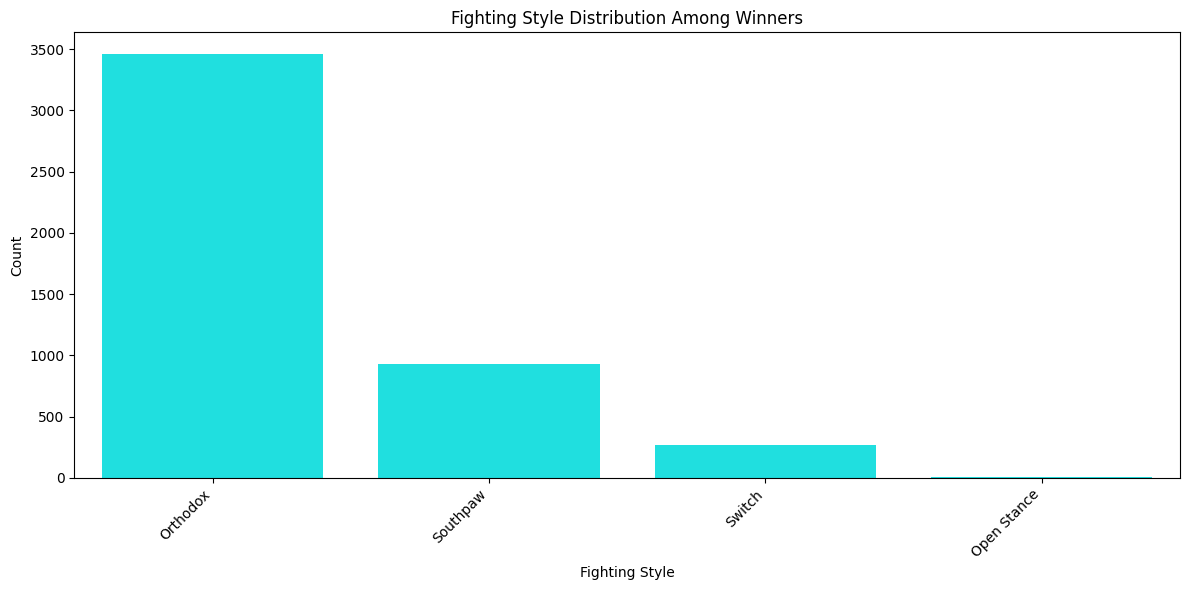

In [64]:
plt.figure(figsize=(12, 6))
sns.countplot(data=ufc_cleaned, x='RedStance', color='cyan', order=ufc_cleaned['RedStance'].value_counts().index)
plt.title('Fighting Style Distribution Among Winners')
plt.xlabel('Fighting Style')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This bar chart shows the distribution of fighting styles (stances) among winners, with a focus on traditional stances like orthodox and southpaw. Popularity of certain stances among winners may suggest strategic advantages in fight tactics or defense mechanisms.

### Age and Win Rate

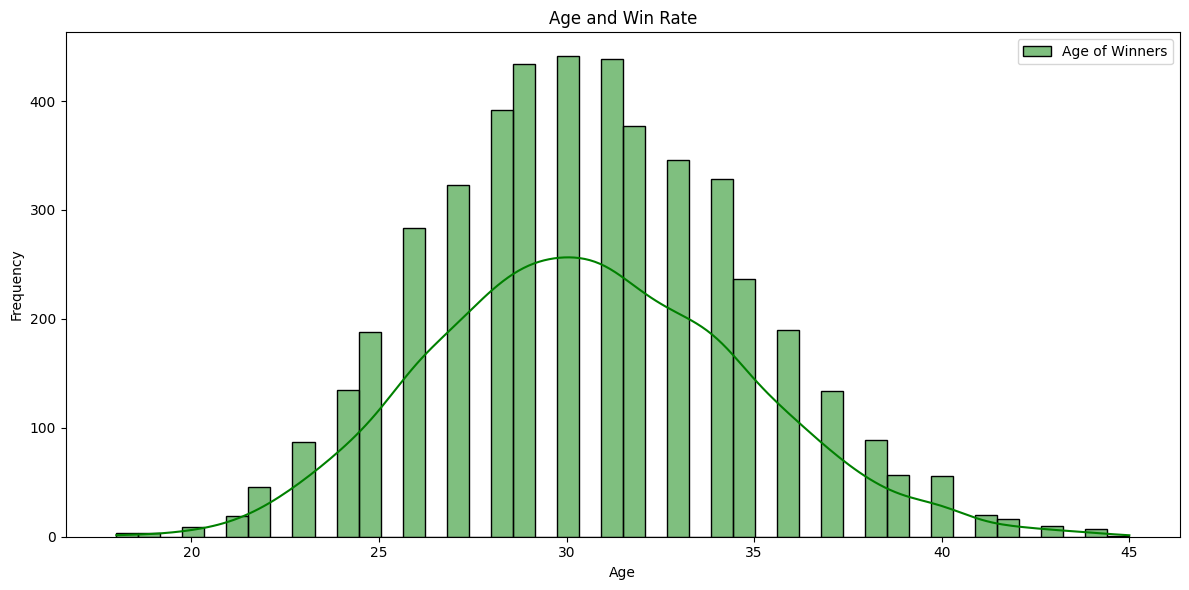

In [65]:
plt.figure(figsize=(12, 6))
sns.histplot(ufc_cleaned['RedAge'], kde=True, color='green', label='Age of Winners')
plt.title('Age and Win Rate')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

The histogram illustrates the age distribution of winners, indicating whether younger or older fighters tend to win more frequently. Observing any peak in certain age ranges can provide insights into the potential advantage of experience and physical condition at different ages.

## UFC Fight Data Visualizations

In [66]:
# Create a new column for "Favorite" and "Underdog"
ufc_cleaned['FavoriteOdds'] = ufc_cleaned[['RedOdds', 'BlueOdds']].min(axis=1)
ufc_cleaned['UnderdogOdds'] = ufc_cleaned[['RedOdds', 'BlueOdds']].max(axis=1)

# Create a new column for whether the favorite fighter won
ufc_cleaned['FavoriteWin'] = ((ufc_cleaned['RedOdds'] < ufc_cleaned['BlueOdds']) & (ufc_cleaned['Winner'] == 'Red')) | \
                             ((ufc_cleaned['BlueOdds'] < ufc_cleaned['RedOdds']) & (ufc_cleaned['Winner'] == 'Blue'))

/var/folders/lt/fsgjhvpn4sn8qyv_xtryy0lm0000gn/T/ipykernel_57747/2912729971.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ufc_cleaned['FavoriteOdds'] = ufc_cleaned[['RedOdds', 'BlueOdds']].min(axis=1)
/var/folders/lt/fsgjhvpn4sn8qyv_xtryy0lm0000gn/T/ipykernel_57747/2912729971.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ufc_cleaned['UnderdogOdds'] = ufc_cleaned[['RedOdds', 'BlueOdds']].max(axis=1)
/var/folders/lt/fsgjhvpn4sn8qyv_xtryy0lm0000gn/T/ipykernel_57747/2912729971.py:6: SettingWithCopyW

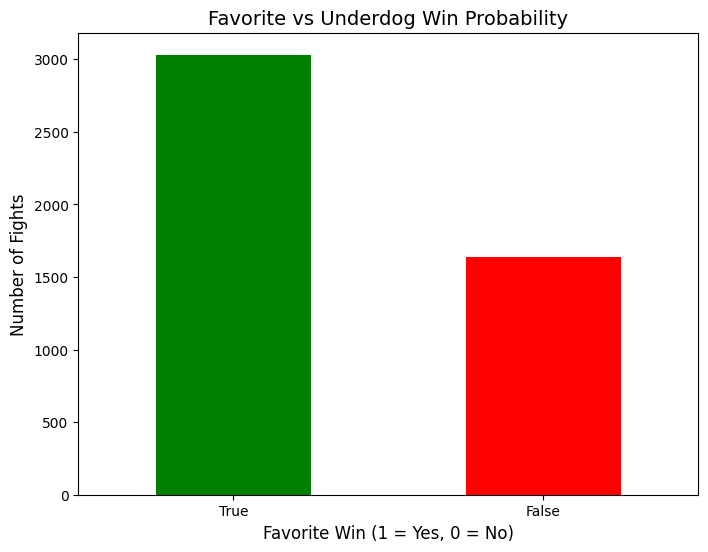

In [67]:
#Favorite vs. Underdog Win Probability
plt.figure(figsize=(8, 6))
ufc_cleaned['FavoriteWin'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Favorite vs Underdog Win Probability', fontsize=14)
plt.xlabel('Favorite Win (1 = Yes, 0 = No)', fontsize=12)
plt.ylabel('Number of Fights', fontsize=12)
plt.xticks(rotation=0)
plt.show()


<Figure size 800x600 with 0 Axes>

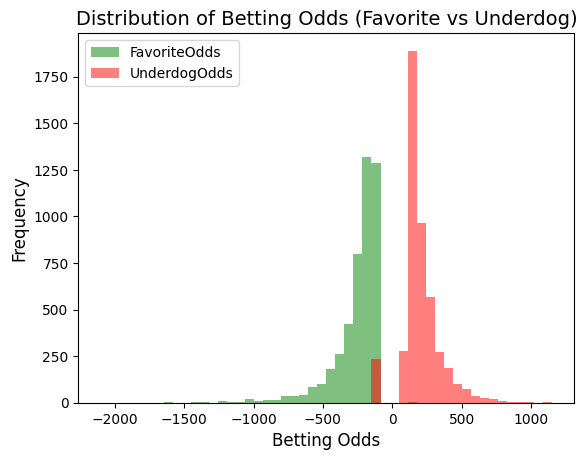

In [68]:
# 2. Distribution of Odds for Favorite and Underdog
plt.figure(figsize=(8, 6))
ufc_cleaned[['FavoriteOdds', 'UnderdogOdds']].plot(kind='hist', alpha=0.5, bins=50, color=['green', 'red'])
plt.title('Distribution of Betting Odds (Favorite vs Underdog)', fontsize=14)
plt.xlabel('Betting Odds', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

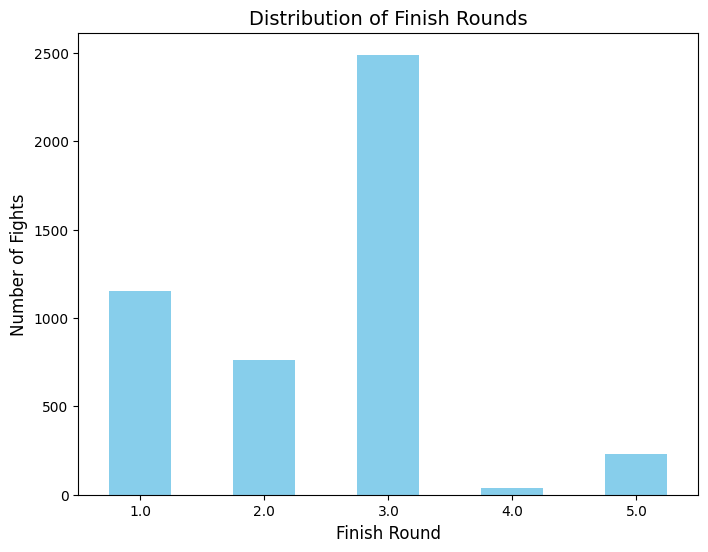

In [69]:
# 1. Finish Round Distribution
plt.figure(figsize=(8, 6))
ufc_cleaned['FinishRound'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Finish Rounds', fontsize=14)
plt.xlabel('Finish Round', fontsize=12)
plt.ylabel('Number of Fights', fontsize=12)
plt.xticks(rotation=0)
plt.show()

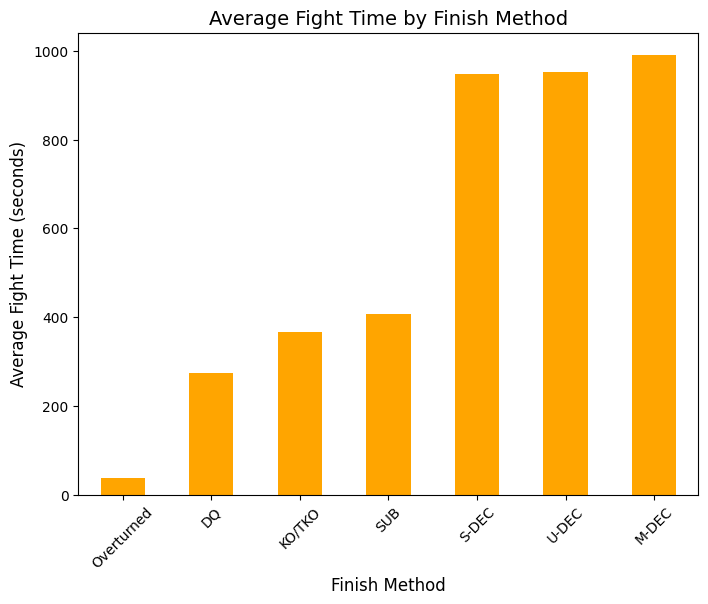

In [70]:
plt.figure(figsize=(8, 6))
ufc_cleaned.groupby('Finish')['TotalFightTimeSecs'].mean().sort_values().plot(kind='bar', color='orange')
plt.title('Average Fight Time by Finish Method', fontsize=14)
plt.xlabel('Finish Method', fontsize=12)
plt.ylabel('Average Fight Time (seconds)', fontsize=12)
plt.xticks(rotation=45)
plt.show()


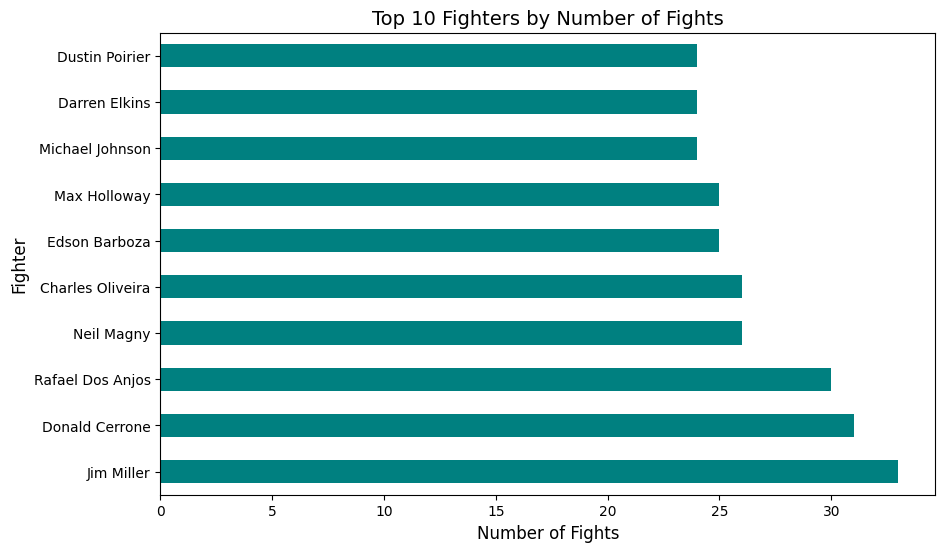

In [71]:
# 1. Top Fighters by Number of Fights (Red + Blue combined)
top_fighters = pd.concat([ufc_cleaned['RedFighter'], ufc_cleaned['BlueFighter']])
top_fighter_counts = top_fighters.value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
top_fighter_counts.plot(kind='barh', color='teal')
plt.title('Top 10 Fighters by Number of Fights', fontsize=14)
plt.xlabel('Number of Fights', fontsize=12)
plt.ylabel('Fighter', fontsize=12)
plt.show()

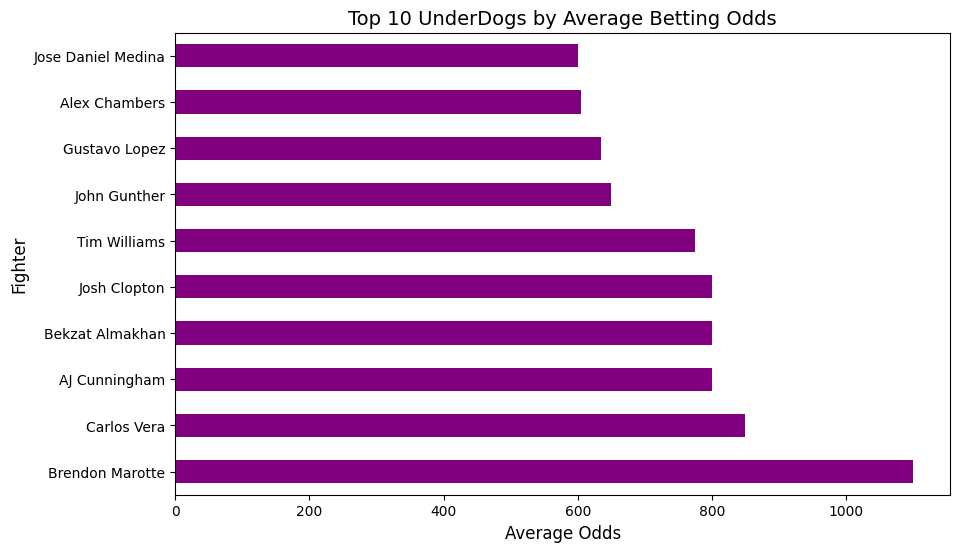

In [72]:
# 3. Average Odds by Top Fighters (Red + Blue combined)
avg_odds_fighter = pd.concat([
    ufc_cleaned[['RedFighter', 'RedOdds']].rename(columns={'RedFighter': 'Fighter', 'RedOdds': 'Odds'}),
    ufc_cleaned[['BlueFighter', 'BlueOdds']].rename(columns={'BlueFighter': 'Fighter', 'BlueOdds': 'Odds'})
])
avg_odds_fighter = avg_odds_fighter.groupby('Fighter')['Odds'].mean().nlargest(10)

plt.figure(figsize=(10, 6))
avg_odds_fighter.plot(kind='barh', color='purple')
plt.title('Top 10 UnderDogs by Average Betting Odds', fontsize=14)
plt.xlabel('Average Odds', fontsize=12)
plt.ylabel('Fighter', fontsize=12)
plt.show()

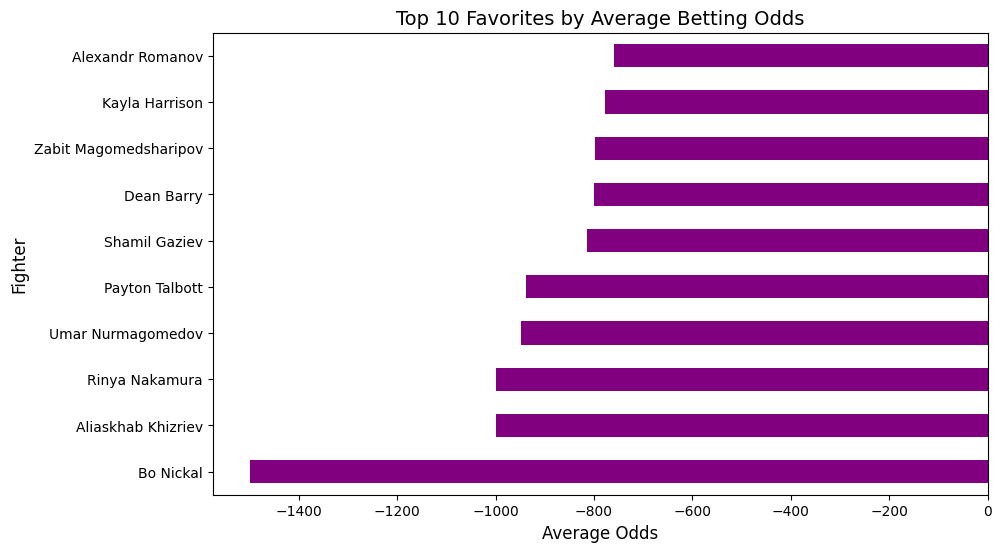

In [73]:
# 3. Average Odds by Top Fighters (Red + Blue combined)
avg_odds_fighter_favorite = pd.concat([
    ufc_cleaned[['RedFighter', 'RedOdds']].rename(columns={'RedFighter': 'Fighter', 'RedOdds': 'Odds'}),
    ufc_cleaned[['BlueFighter', 'BlueOdds']].rename(columns={'BlueFighter': 'Fighter', 'BlueOdds': 'Odds'})
])
avg_odds_fighterfav = avg_odds_fighter_favorite.groupby('Fighter')['Odds'].mean().nsmallest(10)

plt.figure(figsize=(10, 6))
avg_odds_fighterfav.plot(kind='barh', color='purple')
plt.title('Top 10 Favorites by Average Betting Odds', fontsize=14)
plt.xlabel('Average Odds', fontsize=12)
plt.ylabel('Fighter', fontsize=12)
plt.show()

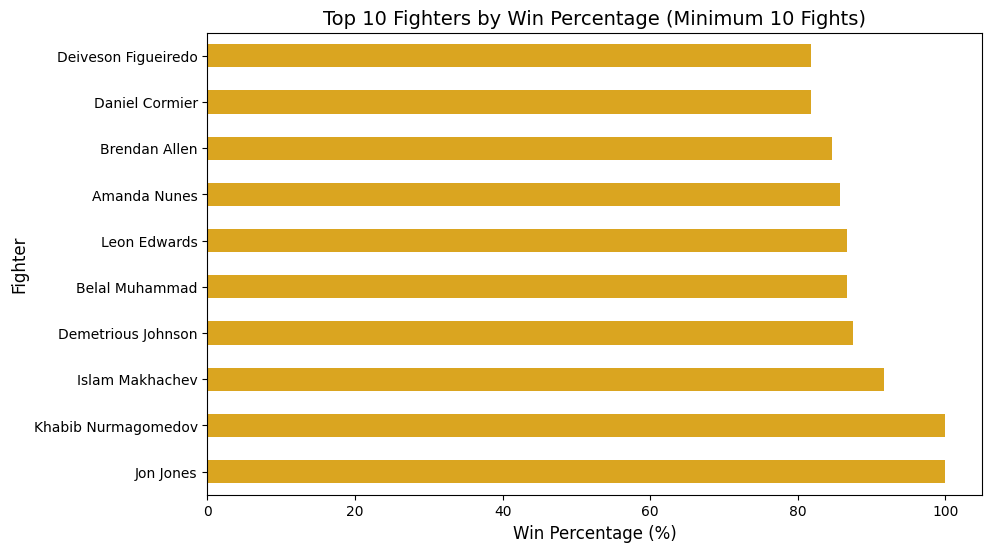

In [74]:
total_fights = pd.concat([ufc_cleaned['RedFighter'], ufc_cleaned['BlueFighter']]).value_counts()

# Counting wins for each fighter (whether they won as Red or Blue)
fighter_wins = pd.concat([
    ufc_cleaned[ufc_cleaned['Winner'] == 'Red']['RedFighter'],
    ufc_cleaned[ufc_cleaned['Winner'] == 'Blue']['BlueFighter']
]).value_counts()

# Calculating win percentage for each fighter
win_percentage = (fighter_wins / total_fights) * 100

# Selecting fighters with at least a certain number of fights (e.g., 10) to avoid small sample sizes
min_fights = 10
top_fighters_win_percentage = win_percentage[total_fights >= min_fights].nlargest(10)

# Plotting top fighters by win percentage
plt.figure(figsize=(10, 6))
top_fighters_win_percentage.plot(kind='barh', color='goldenrod')
plt.title('Top 10 Fighters by Win Percentage (Minimum 10 Fights)', fontsize=14)
plt.xlabel('Win Percentage (%)', fontsize=12)
plt.ylabel('Fighter', fontsize=12)
plt.show()
